<a href="https://colab.research.google.com/github/mmao114/Analysis-of-basic-information-and-reviews-of-ski-resorts/blob/main/%E5%86%B3%E5%AE%9A%E6%A0%91%E4%BF%AE%E6%AD%A3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

クロスバリデーションによる平均二乗誤差 (MSE): 0.48470868292362357
クロスバリデーションによる平均絶対誤差 (MAE): 0.47165940617797714
クロスバリデーションによる決定係数 (R²): 0.7889781841126343


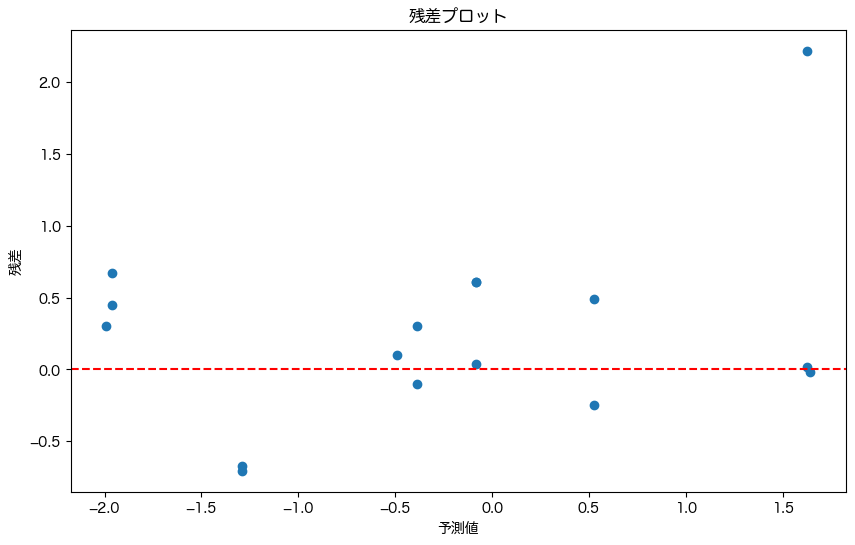

|--- 利用者適応性bc2020 <= 0.11
|   |--- 利用者適応性bc2020 <= -0.89
|   |   |--- 2020−21リフト利用者数 <= 132200.00
|   |   |   |--- 自然環境の魅力 <= -0.69
|   |   |   |   |--- リゾート魅力bc2020 <= 1.05
|   |   |   |   |   |--- value: [-1.51]
|   |   |   |   |--- リゾート魅力bc2020 >  1.05
|   |   |   |   |   |--- value: [-1.69]
|   |   |   |--- 自然環境の魅力 >  -0.69
|   |   |   |   |--- value: [-1.99]
|   |   |--- 2020−21リフト利用者数 >  132200.00
|   |   |   |--- コース総数 <= 18.50
|   |   |   |   |--- value: [-1.29]
|   |   |   |--- コース総数 >  18.50
|   |   |   |   |--- value: [-1.96]
|   |--- 利用者適応性bc2020 >  -0.89
|   |   |--- リゾート魅力af2020 <= 0.55
|   |   |   |--- 自然環境の魅力 <= 1.44
|   |   |   |   |--- value: [-0.05]
|   |   |   |--- 自然環境の魅力 >  1.44
|   |   |   |   |--- value: [-0.08]
|   |   |--- リゾート魅力af2020 >  0.55
|   |   |   |--- 2022−23リフト利用者数 <= 984310.00
|   |   |   |   |--- value: [-0.39]
|   |   |   |--- 2022−23リフト利用者数 >  984310.00
|   |   |   |   |--- value: [-0.49]
|--- 利用者適応性bc2020 >  0.11
|   |--- 利用者適応性af2020 <= 2.28
| 

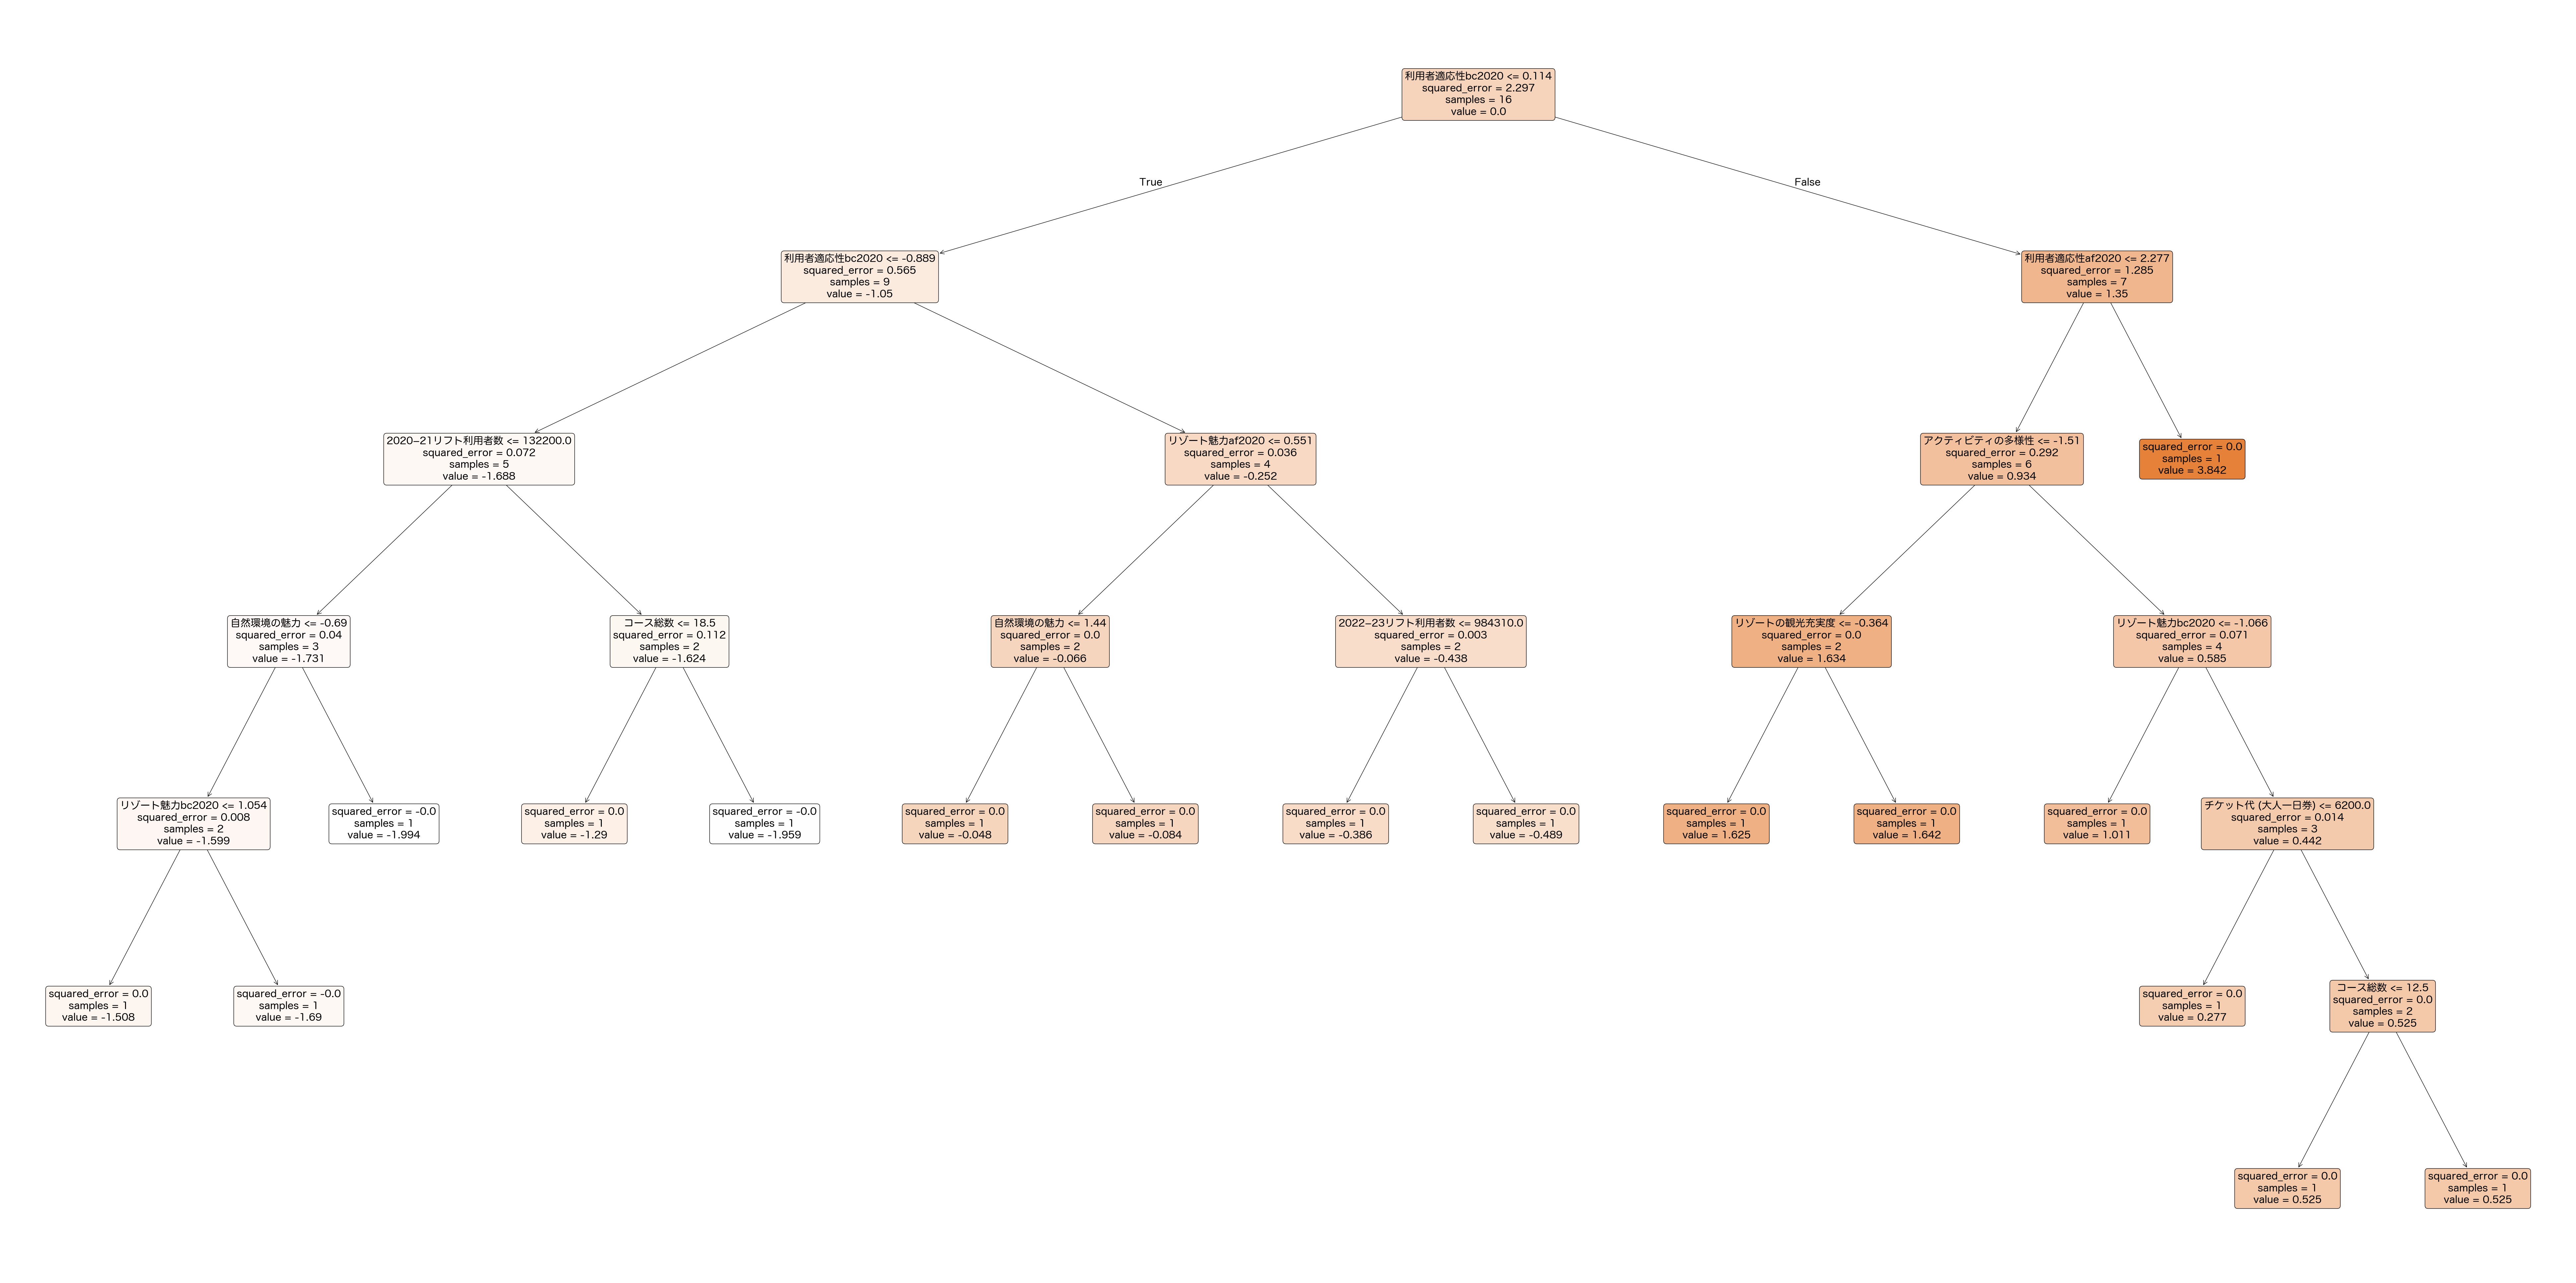

最適なハイパーパラメータ: {'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}
最適モデル テストデータによる平均二乗誤差 (MSE): 0.14377298031223104
最適モデル テストデータによる平均絶対誤差 (MAE): 0.3114394358354215
最適モデル テストデータによる決定係数 (R²): 0.46544372303638903
勾配ブースティング テストデータによる平均二乗誤差 (MSE): 0.8097364983034377
勾配ブースティング テストデータによる平均絶対誤差 (MAE): 0.7964062925503819
勾配ブースティング テストデータによる決定係数 (R²): -2.0106472503708237


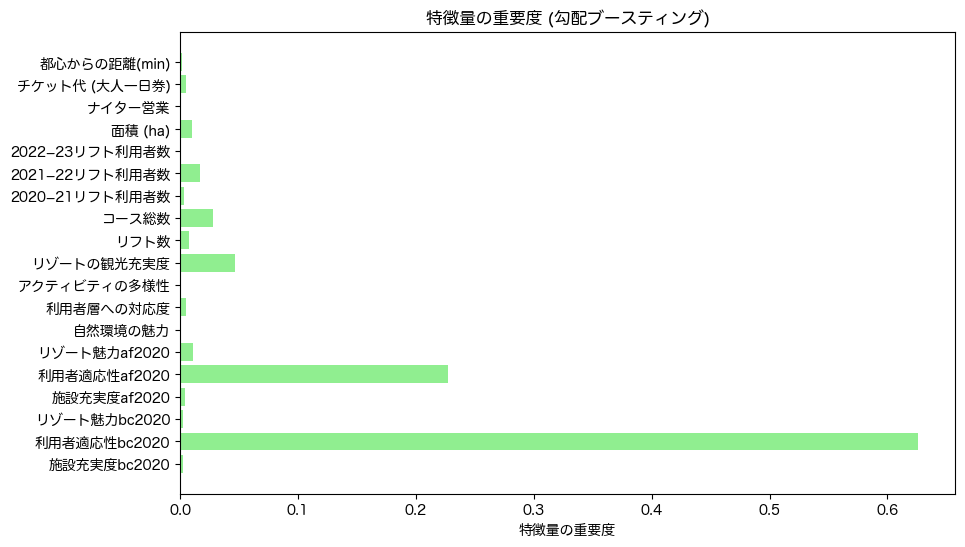

In [ ]:
import pandas as pd
from sklearn.model_selection import cross_val_predict
from sklearn.tree import DecisionTreeRegressor, export_text, plot_tree
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import os

# フォントファイルのパスを手動で設定
font_path = '/content/ヒラギノ丸ゴ ProN W4.ttc'  # 必要に応じてフォントファイルのパスを変更してください
# 日本語フォントの設定
import matplotlib.font_manager as fm
fm.fontManager.addfont(font_path)
plt.rcParams['font.family'] = fm.FontProperties(fname=font_path).get_name()

# ファイルのパスを手動で設定
file_path = '/content/サイド情報.xlsx'  # 必要に応じてExcelファイルのパスを変更してください

# データの読み込み
df = pd.read_excel(file_path)

# データの前処理 - 数値データの変換
df['チケット代 (大人一日券)'] = df['チケット代 (大人一日券)'].str.replace('円', '').astype(float)

# フォントファイルのパスを手動で設定
font_path = '/content/ヒラギノ丸ゴ ProN W4.ttc'  # 必要に応じてフォントファイルのパスを変更してください
# 日本語フォントの設定
import matplotlib.font_manager as fm
fm.fontManager.addfont(font_path)
plt.rcParams['font.family'] = fm.FontProperties(fname=font_path).get_name()

# ファイルのパスを手動で設定
file_path = '/content/サイド情報.xlsx'  # 必要に応じてExcelファイルのパスを変更してください

# データの読み込み
df = pd.read_excel(file_path)

# データの前処理 - 数値データの変換
df['チケット代 (大人一日券)'] = df['チケット代 (大人一日券)'].str.replace('円', '').astype(float)

# ナイター営業の数値データ変換
df['ナイター営業'] = df['ナイター営業'].astype(int)

# 欠損値の处理 - 利用者数のNaNを推测填补
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
df[['リフト数', 'コース総数', '面積 (ha)', 'チケット代 (大人一日券)', '2022−23リフト利用者数']] = imputer.fit_transform(df[['リフト数', 'コース総数', '面積 (ha)', 'チケット代 (大人一日券)', '2022−23リフト利用者数']])
text_data = df.iloc[:, 1].dropna().astype(str).str.cat(sep=' ')  # 将所有文本合并为一个字符串

# 説明変数と目的変数の設定
X = df[['施設充実度bc2020', '利用者適応性bc2020', 'リゾート魅力bc2020', '施設充実度af2020', '利用者適応性af2020', 'リゾート魅力af2020', '自然環境の魅力', '利用者層への対応度', 'アクティビティの多様性', 'リゾートの観光充実度', 'リフト数', 'コース総数', '2020−21リフト利用者数', '2021−22リフト利用者数', '2022−23リフト利用者数', '面積 (ha)', 'ナイター営業', 'チケット代 (大人一日券)', '都心からの距離(min)']]
y = df['利用者適応性bc2020']

# モデルの作成
決定木モデル = DecisionTreeRegressor(random_state=42)

# cross_val_predictを使用して予測値を取得
y_pred_cv = cross_val_predict(決定木モデル, X, y, cv=5)

# モデルの性能評価
mse = mean_squared_error(y, y_pred_cv)
mae = mean_absolute_error(y, y_pred_cv)
r2 = r2_score(y, y_pred_cv)

print(f'クロスバリデーションによる平均二乗誤差 (MSE): {mse}')
print(f'クロスバリデーションによる平均絶対誤差 (MAE): {mae}')
print(f'クロスバリデーションによる決定係数 (R²): {r2}')

# 残差分析 - 残差プロット
residuals = y - y_pred_cv

plt.figure(figsize=(10, 6))
plt.scatter(y_pred_cv, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('予測値')
plt.ylabel('残差')
plt.title('残差プロット')
plt.show()

# モデルの訓練（全データを使用）
決定木モデル.fit(X, y)

# 決定木の可視化（テキスト形式）
決定木ルール = export_text(決定木モデル, feature_names=list(X.columns))
print(決定木ルール)

# 決定木の可視化（グラフ形式）
plt.figure(figsize=(100, 50))
plot_tree(決定木モデル, feature_names=list(X.columns), filled=True, rounded=True)
plt.show()


# データの読み込みと前処理
file_path = '/content/サイド情報.xlsx'  # 必要に応じてExcelファイルのパスを変更してください
df = pd.read_excel(file_path)
df['チケット代 (大人一日券)'] = df['チケット代 (大人一日券)'].str.replace('円', '').astype(float)
df = df.dropna(subset=['2022−23リフト利用者数'])

# 説明変数と目的変数の設定
X = df[['施設充実度bc2020', '利用者適応性bc2020', 'リゾート魅力bc2020', '施設充実度af2020', '利用者適応性af2020', 'リゾート魅力af2020', '自然環境の魅力', '利用者層への対応度', 'アクティビティの多様性', 'リゾートの観光充実度', 'リフト数', 'コース総数', '2020−21リフト利用者数', '2021−22リフト利用者数', '2022−23リフト利用者数', '面積 (ha)', 'ナイター営業', 'チケット代 (大人一日券)', '都心からの距離(min)']]
y = df['利用者適応性bc2020']

# 訓練データとテストデータの分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# グリッドサーチによるランダムフォレストのハイパーパラメータ最適化
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print(f'最適なハイパーパラメータ: {best_params}')

best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

# 最適モデルの評価
test_mse_best = mean_squared_error(y_test, y_pred_best)
test_mae_best = mean_absolute_error(y_test, y_pred_best)
test_r2_best = r2_score(y_test, y_pred_best)

print(f'最適モデル テストデータによる平均二乗誤差 (MSE): {test_mse_best}')
print(f'最適モデル テストデータによる平均絶対誤差 (MAE): {test_mae_best}')
print(f'最適モデル テストデータによる決定係数 (R²): {test_r2_best}')

# 勾配ブースティングモデルの作成と評価
勾配ブースティングモデル = GradientBoostingRegressor(random_state=42, n_estimators=100, max_depth=3)
勾配ブースティングモデル.fit(X_train, y_train)

y_pred_gb = 勾配ブースティングモデル.predict(X_test)

# 勾配ブースティングの評価結果
test_mse_gb = mean_squared_error(y_test, y_pred_gb)
test_mae_gb = mean_absolute_error(y_test, y_pred_gb)
test_r2_gb = r2_score(y_test, y_pred_gb)

print(f'勾配ブースティング テストデータによる平均二乗誤差 (MSE): {test_mse_gb}')
print(f'勾配ブースティング テストデータによる平均絶対誤差 (MAE): {test_mae_gb}')
print(f'勾配ブースティング テストデータによる決定係数 (R²): {test_r2_gb}')

# 特徴量の重要度の可視化
importances_gb = 勾配ブースティングモデル.feature_importances_
feature_names = X.columns

plt.figure(figsize=(10, 6))
plt.barh(feature_names, importances_gb, color='lightgreen')
plt.xlabel('特徴量の重要度')
plt.title('特徴量の重要度 (勾配ブースティング)')
plt.show()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from statsmodels.api import OLS, add_constant

# 数据的读取和前处理
file_path = '/content/drive/MyDrive/tree/サイド情報.xlsx'  # 更改为你的文件路径
df = pd.read_excel(file_path)

# 数据清理：去除包含缺失值的行
df['チケット代 (大人一日券)'] = df['チケット代 (大人一日券)'].str.replace('円', '').astype(float)
df = df.dropna()  # 去除包含缺失值的行

# 选择初始的特征和目标变量
# initial_features = [
#     '施設充実度bc2020', '利用者適応性bc2020', 'リゾート魅力bc2020',
#     '施設充実度af2020', '利用者適応性af2020', 'リゾート魅力af2020',
#     '自然環境の魅力', '利用者層への対応度', 'アクティビティの多様性',
#     'リゾートの観光充実度', 'リフト数', 'コース総数',
#     '2020−21リフト利用者数', '2021−22リフト利用者数',
#     '2022−23リフト利用者数', '面積 (ha)', 'ナイター営業',
#     'チケット代 (大人一日券)', '都心からの距離(min)'
# ]
initial_features = [
     '利用者適応性bc2020', 'リゾート魅力bc2020',
    '施設充実度af2020', '利用者適応性af2020', 'リゾート魅力af2020',
    '自然環境の魅力', '利用者層への対応度', 'アクティビティの多様性',
    'リゾートの観光充実度', 'リフト数', 'コース総数',
    '2020−21リフト利用者数', '2021−22リフト利用者数',
    '2022−23リフト利用者数', '面積 (ha)', 'ナイター営業',
    'チケット代 (大人一日券)', '都心からの距離(min)'
]
y = df['施設充実度bc2020']
X = df[initial_features]

# 添加常数项
X_const = add_constant(X)

# 逐步回归函数
def stepwise_regression(X, y):
    initial_features = X.columns.tolist()
    selected_features = []
    while True:
        remaining_features = list(set(initial_features) - set(selected_features))
        new_pvals = pd.Series(index=remaining_features)

        for feature in remaining_features:
            model = OLS(y, add_constant(X[selected_features + [feature]])).fit()
            new_pvals[feature] = model.pvalues[feature]

        min_pval = new_pvals.min()
        if min_pval < 0.05:  # 选择p值小于0.05的特征
            selected_features.append(new_pvals.idxmin())
            print(f'添加特征: {new_pvals.idxmin()} - p值: {min_pval}')
        else:
            break

    while True:
        model = OLS(y, add_constant(X[selected_features])).fit()
        pvalues = model.pvalues.iloc[1:]  # 排除常数项的p值

        max_pval = pvalues.max()
        if max_pval > 0.05:  # 移除p值大于0.05的特征
            worst_feature = pvalues.idxmax()
            selected_features.remove(worst_feature)
            print(f'移除特征: {worst_feature} - p值: {max_pval}')
        else:
            break

    return selected_features

# 运行逐步回归
best_features = stepwise_regression(X_const, y)
print(f'最优特征: {best_features}')

# 最终模型评估
final_model = OLS(y, add_constant(X[best_features])).fit()
final_mse = mean_squared_error(y, final_model.predict(add_constant(X[best_features])))
final_mae = mean_absolute_error(y, final_model.predict(add_constant(X[best_features])))
final_r2 = r2_score(y, final_model.predict(add_constant(X[best_features])))

print(f'最终模型 - MSE: {final_mse}, MAE: {final_mae}, R²: {final_r2}')


添加特征: 施設充実度af2020 - p值: 3.392852065392596e-10
添加特征: リゾート魅力bc2020 - p值: 0.0027754338881217557
最优特征: ['施設充実度af2020', 'リゾート魅力bc2020']
最终模型 - MSE: 0.05603700622345264, MAE: 0.19918323809045138, R²: 0.9855471493809458


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from statsmodels.api import OLS, add_constant
from sklearn.tree import DecisionTreeRegressor, plot_tree
import matplotlib.font_manager as fm

# フォントファイルのパスを手動で設定
font_path = '/content/drive/MyDrive/tree/ヒラギノ丸ゴ ProN W4.ttc'  # 必要に応じてフォントファイルのパスを変更してください
# 日本語フォントの設定
import matplotlib.font_manager as fm
fm.fontManager.addfont(font_path)
plt.rcParams['font.family'] = fm.FontProperties(fname=font_path).get_name()

# 数据的读取和前处理
file_path = '/content/drive/MyDrive/tree/サイド情報.xlsx'  # 更改为你的文件路径
df = pd.read_excel(file_path)

# 数据清理：去除包含缺失值的行
df['チケット代 (大人一日券)'] = df['チケット代 (大人一日券)'].str.replace('円', '').astype(float)
df = df.dropna()  # 去除包含缺失值的行

# 选择初始的特征和目标变量
initial_features = [
    '施設充実度bc2020', '利用者適応性bc2020',
    'リゾート魅力af2020', '施設充実度af2020', '利用者適応性af2020',
    '自然環境の魅力', '利用者層への対応度', 'アクティビティの多様性',
    'リゾートの観光充実度', 'リフト数', 'コース総数',
    '2020−21リフト利用者数', '2021−22リフト利用者数',
    '2022−23リフト利用者数', '面積 (ha)', 'ナイター営業',
    'チケット代 (大人一日券)', '都心からの距離(min)'
]
y = df['リゾート魅力bc2020']
X = df[initial_features]
# column_name = y[0]

# 添加常数项
X_const = add_constant(X)

# 逐步回归函数
def stepwise_regression(X, y):
    initial_features = X.columns.tolist()
    selected_features = []
    results = []  # 保存特征和p值

    while True:
        remaining_features = list(set(initial_features) - set(selected_features))
        new_pvals = pd.Series(index=remaining_features)

        for feature in remaining_features:
            model = OLS(y, add_constant(X[selected_features + [feature]])).fit()
            new_pvals[feature] = model.pvalues[feature]

        min_pval = new_pvals.min()
        if min_pval < 0.05:  # 选择p值小于0.05的特征
            selected_features.append(new_pvals.idxmin())
            results.append((new_pvals.idxmin(), min_pval))
            print(f'添加特征: {new_pvals.idxmin()} - p值: {min_pval}')
        else:
            break

    while True:
        model = OLS(y, add_constant(X[selected_features])).fit()
        pvalues = model.pvalues.iloc[1:]  # 排除常数项的p值

        max_pval = pvalues.max()
        if max_pval > 0.05:  # 移除p值大于0.05的特征
            worst_feature = pvalues.idxmax()
            selected_features.remove(worst_feature)
            print(f'移除特征: {worst_feature} - p值: {max_pval}')
        else:
            break

    # 记录每一步选择特征的结果
    if selected_features:
        print(f'最优特征: {selected_features}')
    else:
        print('没有选择到任何特征，模型无法训练。')

    return selected_features, results

# 运行逐步回归
best_features, feature_results = stepwise_regression(X_const, y)
print(f'最优特征: {best_features}')

# 最终模型评估
if best_features:  # 检查是否有最优特征
    final_model = OLS(y, add_constant(X[best_features])).fit()
    final_mse = mean_squared_error(y, final_model.predict(add_constant(X[best_features])))
    final_mae = mean_absolute_error(y, final_model.predict(add_constant(X[best_features])))
    final_r2 = r2_score(y, final_model.predict(add_constant(X[best_features])))

    print(f'最终模型 - MSE: {final_mse}, MAE: {final_mae}, R²: {final_r2}')

    # 绘制特征重要性图
    plt.figure(figsize=(10, 6))
    feature_importance = np.abs(final_model.params[1:])  # 不包括常数项
    sns.barplot(x=feature_importance, y=best_features, palette='viridis')
    plt.xlabel('特徴の重要性')  # 修改为日语
    plt.title('特徴の重要性図')  # 修改为日语
    plt.savefig(f'/content/drive/MyDrive/tree/{y.name}特徴の重要性図.svg')  # 保存为SVG格式
    plt.close()

    # 绘制散点图
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=y, y=final_model.predict(add_constant(X[best_features])), color='blue')
    plt.xlabel('実際の値')  # 修改为日语
    plt.ylabel('予測値')  # 修改为日语
    plt.title('散布図')  # 修改为日语
    plt.savefig('/content/drive/MyDrive/tree/' + y.name + '散布図.svg')  # 保存为SVG格式
    plt.close()

    # 决策树模型
    dt_model = DecisionTreeRegressor()
    dt_model.fit(X[best_features], y)

    plt.figure(figsize=(12, 8))
    plot_tree(dt_model, feature_names=best_features, filled=True)
    plt.title('決定木')  # 修改为日语
    plt.savefig('/content/drive/MyDrive/tree/' + y.name + '決定木.svg')  # 保存为SVG格式
    plt.close()
else:
    print("没有选择到任何特征，模型无法训练。")
    final_results = pd.DataFrame([{'特徴': '最終モデル', 'p値': '無最適特征'}])

# 保存结果到Excel文件
results_df = pd.DataFrame(feature_results, columns=['特徴', 'p値'])  # 修改为日语
final_results = pd.concat([results_df, final_results], ignore_index=True)
final_results.to_excel('/content/drive/MyDrive/tree/' + y.name + '逐步回帰結果.xlsx', index=False)  # 修改为日语




没有选择到任何特征，模型无法训练。
最优特征: []
没有选择到任何特征，模型无法训练。


In [ ]:
import pandas as pd
from sklearn.impute import KNNImputer

# データの読み込み
file_path = '/content/サイド情報.xlsx'  # 请替换为您上传的文件路径
df = pd.read_excel(file_path)

# 欠損値の处理 - 仅对空白部分的 '2020−21リフト利用者数', '2021−22リフト利用者数', '2022−23リフト利用者数' 进行NaN值填补
imputer = KNNImputer(n_neighbors=5)
imputed_data = imputer.fit_transform(df[['リフト数', 'コース総数', '2020−21リフト利用者数', '2021−22リフト利用者数', '2022−23リフト利用者数', '面積 (ha)', 'ナイター営業', '都心からの距離(min)']])
df[['2020−21リフト利用者数', '2021−22リフト利用者数', '2022−23リフト利用者数']] = imputed_data[:, 2:5]

# 将所有文本合并为一个字符串
text_data = df.iloc[:, 1].dropna().astype(str).str.cat(sep=' ')

# 将结果导出到文件
output_path = '/content/combined_text_data.txt'  # 替换为所需的输出路径
with open(output_path, 'w') as file:
    file.write(text_data)

# 将填补后的数据导出为Excel
excel_output_path = '/content/filled_data.xlsx'  # 替换为所需的输出路径
df.to_excel(excel_output_path, index=False)

# 目的変数の設定
y = df['利用者適応性bc2020']
